In [15]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Experiment 1: Degrees of laziness

Text(0, 0.5, 'Average number (20 runs) of agents that survived')

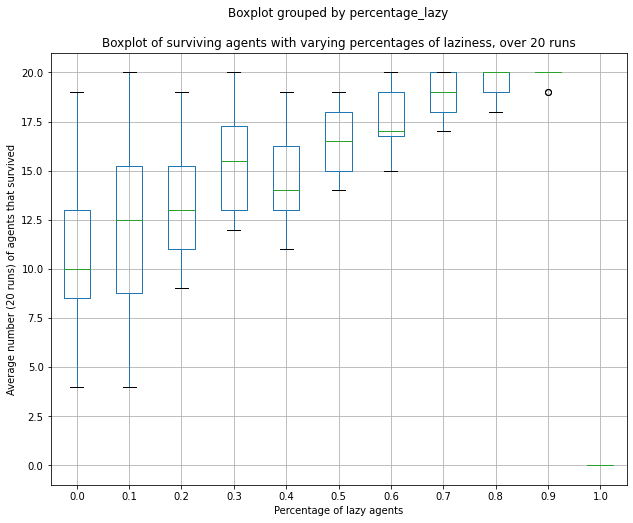

In [16]:
df = pd.read_csv('log.csv', names=['percentage_lazy', 'num_agents','avg_health' ])
df['adjusted_fitness'] = (df['num_agents'] * df['avg_health']) / 20
df.head()

# grouped = df.groupby(['percentage_lazy']).mean()


fig, ax = plt.subplots(figsize=(10,8))

df.boxplot(column=['num_agents'], by='percentage_lazy', ax=ax)
ax.set_title("Boxplot of surviving agents with varying percentages of laziness, over 20 runs")
ax.set_xlabel("Percentage of lazy agents")
ax.set_ylabel("Average number (20 runs) of agents that survived")

Text(0, 0.5, 'Average health (20 runs) of agents that survived')

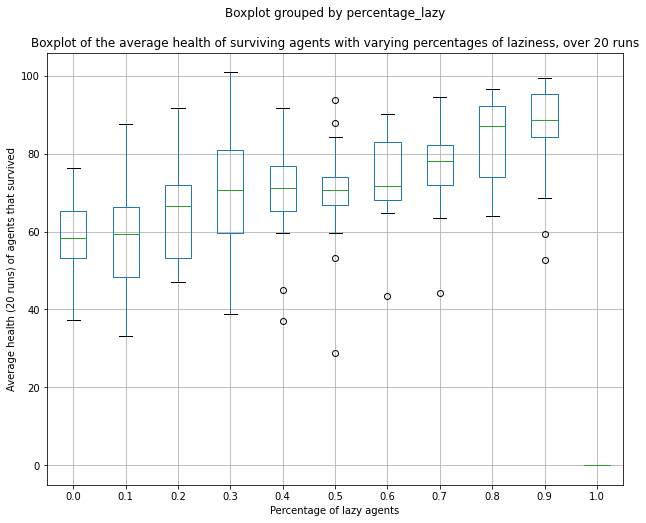

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['avg_health'], by='percentage_lazy', ax=ax)
ax.set_title("Boxplot of the average health of surviving agents with varying percentages of laziness, over 20 runs")
ax.set_xlabel("Percentage of lazy agents")
ax.set_ylabel("Average health (20 runs) of agents that survived")

Text(0, 0.5, 'Fitness (20 runs) of agents that survived')

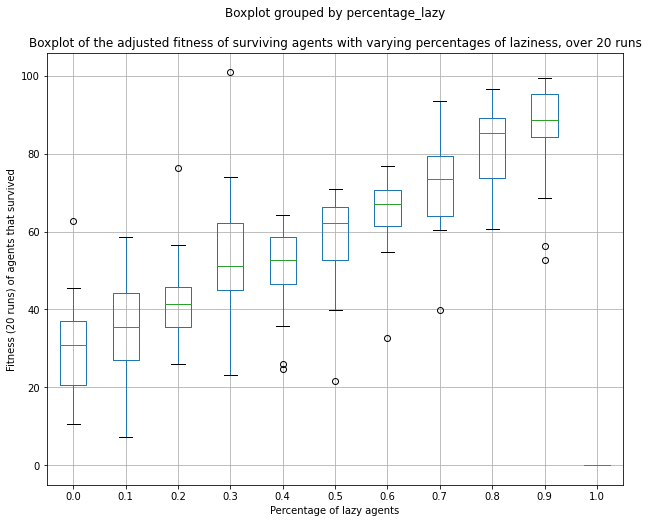

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['adjusted_fitness'], by='percentage_lazy', ax=ax)
ax.set_title("Boxplot of the adjusted fitness of surviving agents with varying percentages of laziness, over 20 runs")
ax.set_xlabel("Percentage of lazy agents")
ax.set_ylabel("Fitness (20 runs) of agents that survived")

# Experiment 2: Selfish vs Cooperative

In [19]:
df = pd.read_csv('log.csv', names=['selfish', 'num_agents','avg_health' ])

# df.head()

In [20]:
unselfish = df[df['selfish'] == 0.0]

unselfish.head()

selfish = pd.read_csv('log_2.csv', names=['num_agents','avg_health' ])

selfish['selfish'] = 1

selfish.head()

experiment_2 = [unselfish, selfish]

df1 = pd.concat(experiment_2)
df1['adjusted_fitness'] = (df1['num_agents'] * df1['avg_health']) / 20


([<matplotlib.axis.XTick at 0x118fa3130>,
 [Text(1, 0, 'unselfish'), Text(2, 0, 'selfish')])

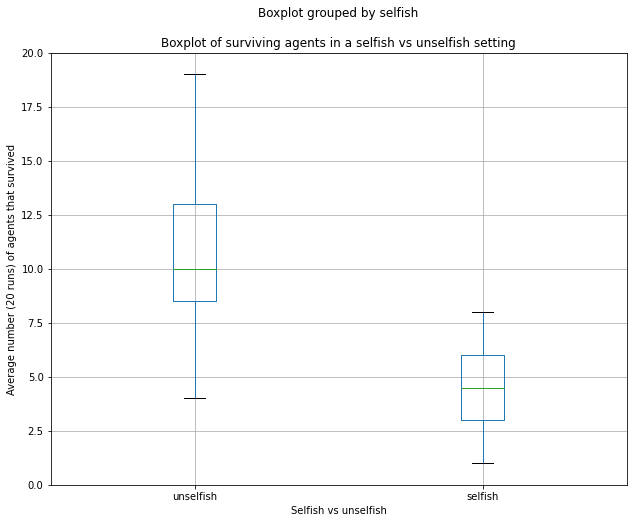

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

df1.boxplot(column=['num_agents'], by='selfish', ax=ax)
ax.set_title("Boxplot of surviving agents in a selfish vs unselfish setting")
ax.set_xlabel("Selfish vs unselfish")
ax.set_ylabel("Average number (20 runs) of agents that survived")
plt.ylim(0, 20)
x = [1,2]
values = ['unselfish','selfish']

plt.xticks(x,values)

([<matplotlib.axis.XTick at 0x118bf2f10>,
 [Text(1, 0, 'unselfish'), Text(2, 0, 'selfish')])

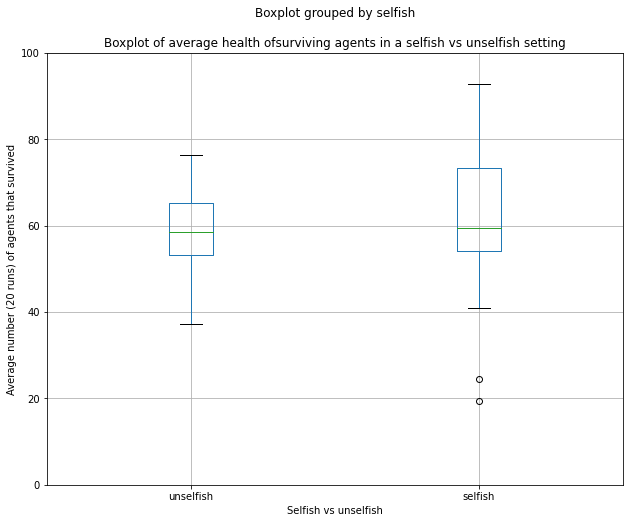

In [22]:
fig, ax = plt.subplots(figsize=(10,8))

df1.boxplot(column=['avg_health'], by='selfish', ax=ax)
ax.set_title("Boxplot of average health ofsurviving agents in a selfish vs unselfish setting")
ax.set_xlabel("Selfish vs unselfish")
ax.set_ylabel("Average number (20 runs) of agents that survived")
plt.ylim(0, 100)
plt.xticks(x,values)

([<matplotlib.axis.XTick at 0x1190928b0>,
 [Text(1, 0, 'unselfish'), Text(2, 0, 'selfish')])

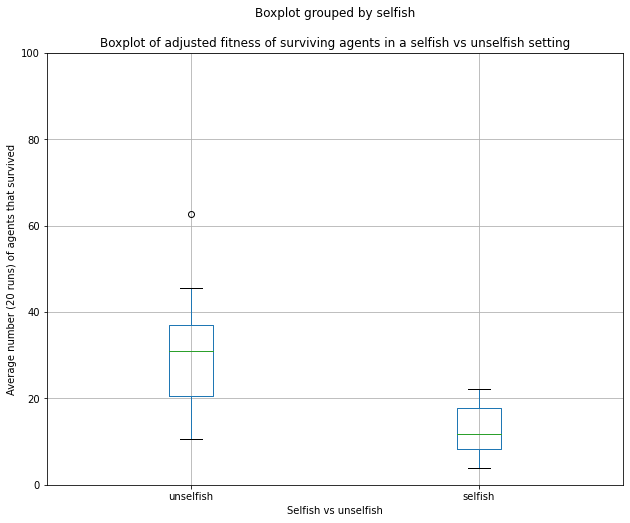

In [23]:
fig, ax = plt.subplots(figsize=(10,8))

df1.boxplot(column=['adjusted_fitness'], by='selfish', ax=ax)
ax.set_title("Boxplot of adjusted fitness of surviving agents in a selfish vs unselfish setting")
ax.set_xlabel("Selfish vs unselfish")
ax.set_ylabel("Average number (20 runs) of agents that survived")
plt.ylim(0, 100)
plt.xticks(x,values)

# Experiment 3: low number of runs

In [24]:
df2 = pd.read_csv('log_3.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df2['chance_of_selfishness'] = df2['chance_of_selfishness']/10

df2.head()

df2['percentage_wandering'] = 1-df2['percentage_lazy']

df2.head()

df2['adjusted_chance_of_selfishness'] = df2['chance_of_selfishness'] * df2['percentage_wandering']

df2['adjusted_chance_of_sharing'] = (1-df2['chance_of_selfishness']) * df2['percentage_wandering']

df2['adjusted_fitness'] = (df2['num_agents'] * df2['avg_health']) / 20

df2.head()

# grouped_multiple = df2.groupby(['percentage_lazy', 'chance_of_selfishness']).agg({'num_agents': ['mean']})
# grouped_multiple.columns = ['num_agents_mean']
# grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple.iloc[15:20]

percentage_lazy = df2['percentage_lazy']
coself = df2['adjusted_chance_of_selfishness']
cosharing = df2['adjusted_chance_of_sharing']
num_agents = df2['num_agents']
avg_health = df2['avg_health']
fitness = df2['adjusted_fitness']

In [25]:
from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'white', 'lightcoral', 'red', 'darkred']
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

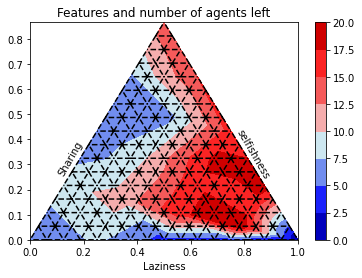

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [27]:
grouped_multiple = df2.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['mean']})
grouped_multiple.columns = ['num_agents_mean']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple

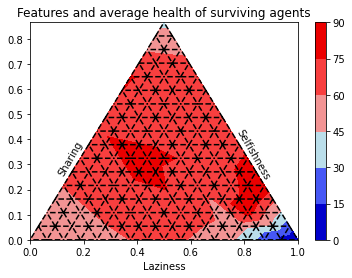

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c)
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

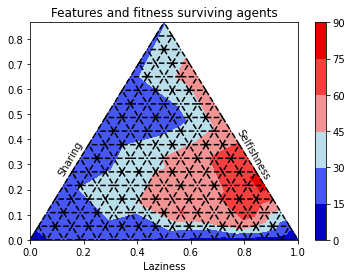

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c)
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [30]:
grouped_multiple = df2.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['mean']})
grouped_multiple.columns = ['avg_health_mean']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple

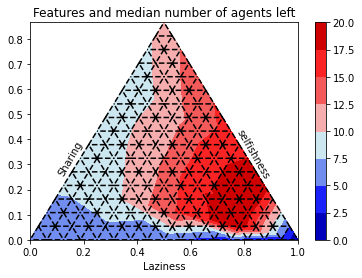

In [31]:
grouped_multiple = df2.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

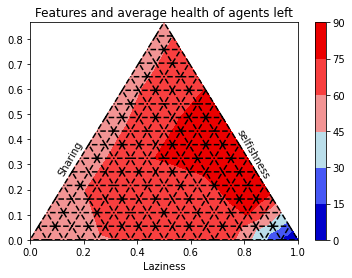

In [32]:
grouped_multiple = df2.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
average = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = average

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

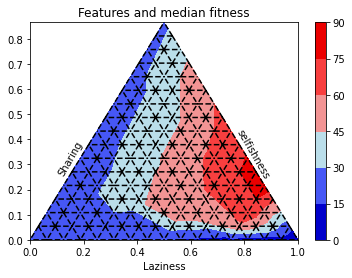

In [33]:
grouped_multiple = df2.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
fit = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fit

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

# Ternary 20 runs

In [41]:
df3 = pd.read_csv('log_4.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df3['chance_of_selfishness'] = df3['chance_of_selfishness']

# df3 = df3.sort_values(by=['percentage_lazy'])

# df3.tail()

df3['percentage_wandering'] = 1-df3['percentage_lazy']
df3['adjusted_fitness'] = (df3['num_agents'] * df3['avg_health']) / 20


# df3.head()

df3['adjusted_chance_of_selfishness'] = df3['chance_of_selfishness'] * df3['percentage_wandering']
df3['adjusted_chance_of_sharing'] = (1-df3['chance_of_selfishness']) * df3['percentage_wandering']

# df3.head()

percentage_lazy = df3['percentage_lazy']
coself = df3['adjusted_chance_of_selfishness']
cosharing = df3['adjusted_chance_of_sharing']
num_agents = df3['num_agents']
avg_health = df3['avg_health']
fitness = df3['adjusted_fitness']

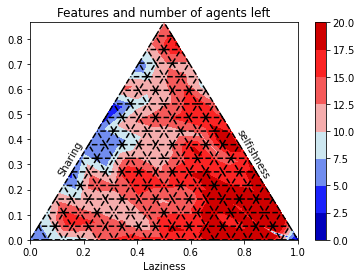

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

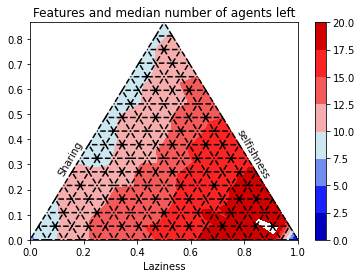

In [43]:
grouped_multiple = df3.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [44]:
# df3.tail()

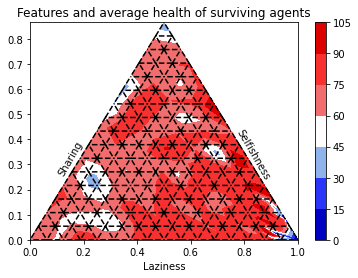

In [45]:
percentage_lazy = df3['percentage_lazy']
coself = df3['adjusted_chance_of_selfishness']
cosharing = df3['adjusted_chance_of_sharing']
num_agents = df3['num_agents']
avg_health = df3['avg_health']
fitness = df3['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

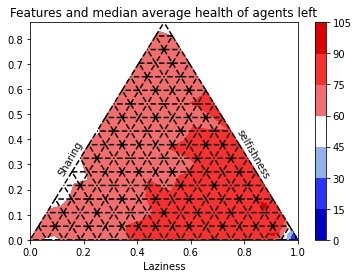

In [46]:
grouped_multiple = df3.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
average = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = average

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median average health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

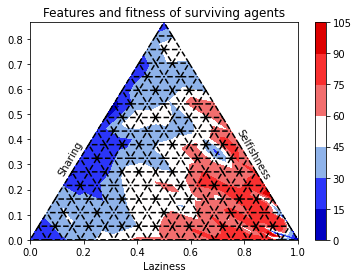

In [47]:
percentage_lazy = df3['percentage_lazy']
coself = df3['adjusted_chance_of_selfishness']
cosharing = df3['adjusted_chance_of_sharing']
num_agents = df3['num_agents']
avg_health = df3['avg_health']
fitness = df3['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

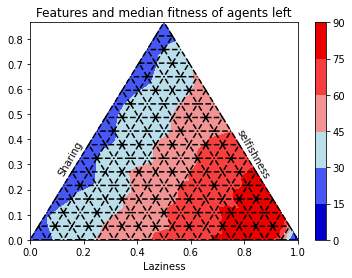

In [48]:
grouped_multiple = df3.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
fitness = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [49]:
# df3.adjusted_chance_of_selfishness.unique()

In [50]:
# df3.adjusted_chance_of_sharing.unique()

In [51]:
# df3.head()

# Ternary 30x30 map, 20 runs

In [55]:
df4 = pd.read_csv('log_5.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df4['chance_of_selfishness'] = df4['chance_of_selfishness']
df4['adjusted_fitness'] = (df4['num_agents'] * df4['avg_health']) / 20

df4['percentage_wandering'] = 1-df4['percentage_lazy']

df4['adjusted_chance_of_selfishness'] = df4['chance_of_selfishness'] * df4['percentage_wandering']
df4['adjusted_chance_of_sharing'] = (1-df4['chance_of_selfishness']) * df4['percentage_wandering']

percentage_lazy = df4['percentage_lazy']
coself = df4['adjusted_chance_of_selfishness']
cosharing = df4['adjusted_chance_of_sharing']
num_agents = df4['num_agents']
avg_health = df4['avg_health']
fitness = df4['adjusted_fitness']

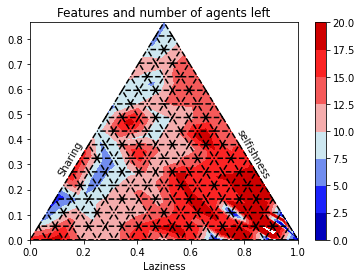

In [56]:
percentage_lazy = df4['percentage_lazy']
coself = df4['adjusted_chance_of_selfishness']
cosharing = df4['adjusted_chance_of_sharing']
num_agents = df4['num_agents']
avg_health = df4['avg_health']
fitness = df4['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

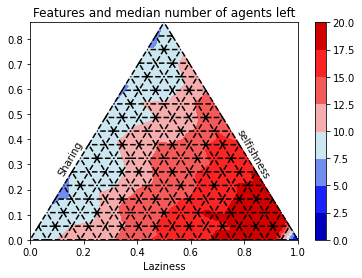

In [57]:
grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

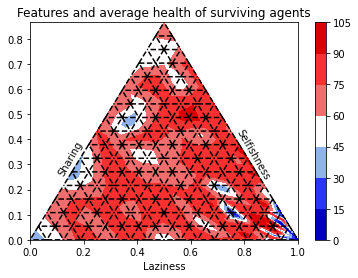

In [58]:
percentage_lazy = df4['percentage_lazy']
coself = df4['adjusted_chance_of_selfishness']
cosharing = df4['adjusted_chance_of_sharing']
num_agents = df4['num_agents']
avg_health = df4['avg_health']
fitness = df4['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

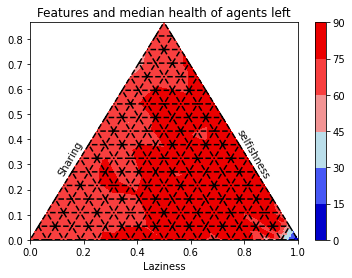

In [59]:
grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
average = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = average

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

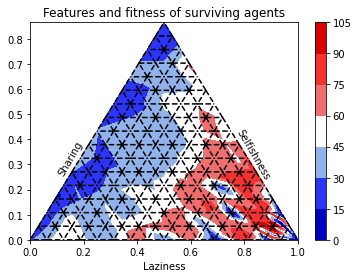

In [60]:
percentage_lazy = df4['percentage_lazy']
coself = df4['adjusted_chance_of_selfishness']
cosharing = df4['adjusted_chance_of_sharing']
num_agents = df4['num_agents']
avg_health = df4['avg_health']
fitness = df4['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

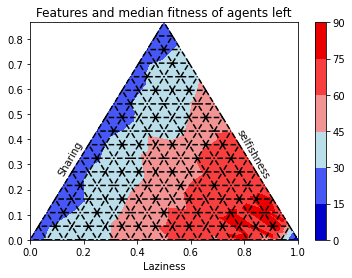

In [61]:
grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
fitness = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [62]:
grouped_multiple = df4.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']

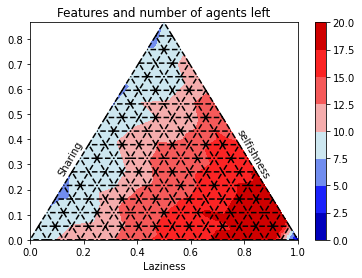

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [64]:
# pd.set_option('display.max_rows', 500)
# grouped_multiple.sort_values(by=['num_agents'])

# Ternary 50 agents

In [68]:
df5 = pd.read_csv('log_6.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df6 = pd.read_csv('logtay.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df7 = pd.read_csv('log_lazy.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])

frames = [df5, df6, df7]

df8 = pd.concat(frames)

df8['chance_of_selfishness'] = df8['chance_of_selfishness']

df8['percentage_wandering'] = 1-df8['percentage_lazy']

df8['adjusted_chance_of_selfishness'] = df8['chance_of_selfishness'] * df8['percentage_wandering']
df8['adjusted_chance_of_sharing'] = (1-df8['chance_of_selfishness']) * df8['percentage_wandering']
df8['adjusted_fitness'] = (df8['num_agents'] * df8['avg_health']) / 50
percentage_lazy = df8['percentage_lazy']
coself = df8['adjusted_chance_of_selfishness']
cosharing = df8['adjusted_chance_of_sharing']
num_agents = df8['num_agents']
avg_health = df8['avg_health']
fitness = df8['adjusted_fitness']

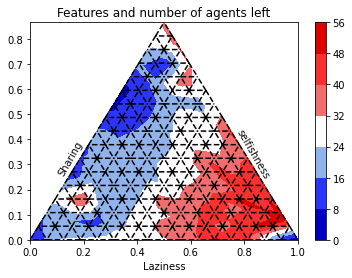

In [69]:

percentage_lazy = df8['percentage_lazy']
coself = df8['adjusted_chance_of_selfishness']
cosharing = df8['adjusted_chance_of_sharing']
num_agents = df8['num_agents']
avg_health = df8['avg_health']
fitness = df8['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

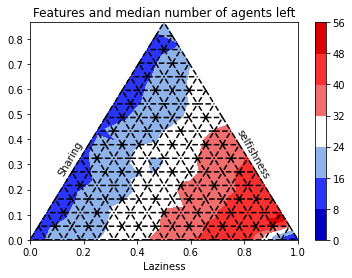

In [70]:
grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

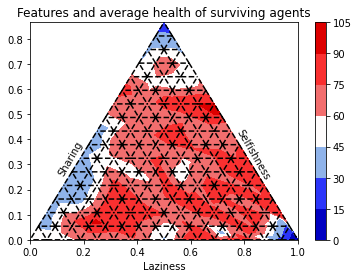

In [71]:
percentage_lazy = df8['percentage_lazy']
coself = df8['adjusted_chance_of_selfishness']
cosharing = df8['adjusted_chance_of_sharing']
num_agents = df8['num_agents']
avg_health = df8['avg_health']
fitness = df8['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

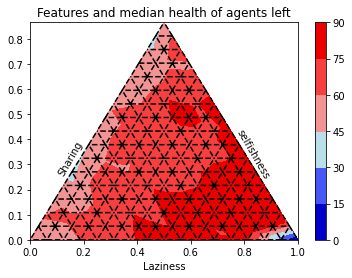

In [72]:
grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
avg_health = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

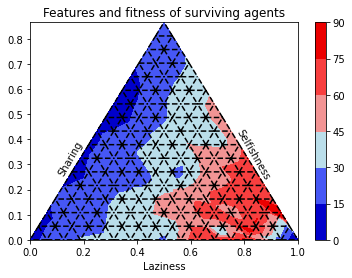

In [73]:
percentage_lazy = df8['percentage_lazy']
coself = df8['adjusted_chance_of_selfishness']
cosharing = df8['adjusted_chance_of_sharing']
num_agents = df8['num_agents']
avg_health = df8['avg_health']
fitness = df8['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of surviving agents')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'Selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

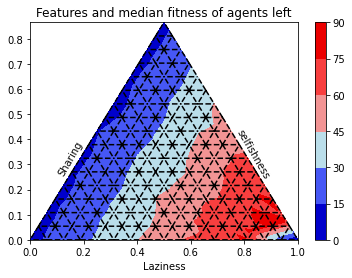

In [74]:
grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
fitness = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [75]:
grouped_multiple = df8.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


In [76]:
percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']

In [77]:
from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'lightcoral', 'red', 'darkred']
v = [0,.12,.4,.5,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

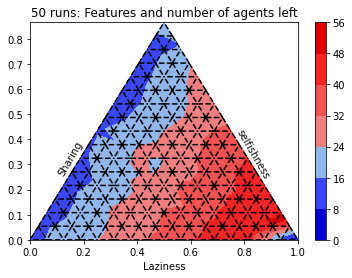

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('50 runs: Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [79]:
# df8.sort_values(by=['num_agents'], ascending=False)

# Ternary 50 agents 30x30

In [82]:
df9 = pd.read_csv('logtay2.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df10 = pd.read_csv('log_lazy.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])

frames = [df9, df10]
df11 = pd.concat(frames)

df11['chance_of_selfishness'] = df11['chance_of_selfishness']

df11['percentage_wandering'] = 1-df11['percentage_lazy']

df11['adjusted_chance_of_selfishness'] = df11['chance_of_selfishness'] * df11['percentage_wandering']
df11['adjusted_chance_of_sharing'] = (1-df11['chance_of_selfishness']) * df11['percentage_wandering']
df11['adjusted_fitness'] = (df11['num_agents'] * df11['avg_health']) / 50

# df11['adjusted_fitness'] = (df11['num_agents'] * df11['avg_health']) / 50

percentage_lazy = df11['percentage_lazy']
coself = df11['adjusted_chance_of_selfishness']
cosharing = df11['adjusted_chance_of_sharing']
num_agents = df11['num_agents']
avg_health = df11['avg_health']

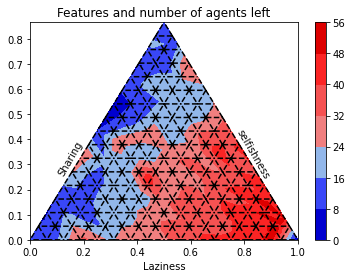

In [83]:
percentage_lazy = df11['percentage_lazy']
coself = df11['adjusted_chance_of_selfishness']
cosharing = df11['adjusted_chance_of_sharing']
num_agents = df11['num_agents']
avg_health = df11['avg_health']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [84]:
grouped_multiple = df11.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


In [85]:
percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']

In [86]:
from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'lightcoral', 'red', 'darkred']
v = [0,.12,.4,.5,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

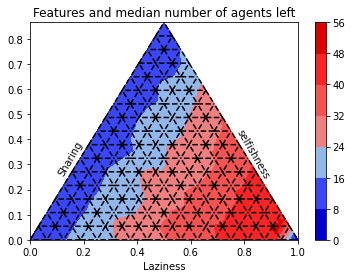

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

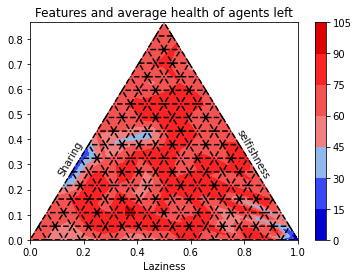

In [88]:
percentage_lazy = df11['percentage_lazy']
coself = df11['adjusted_chance_of_selfishness']
cosharing = df11['adjusted_chance_of_sharing']
num_agents = df11['num_agents']
avg_health = df11['avg_health']
# fitness = df11['adjusted_fitness']
df11['avg_health'] = np.array(df11['avg_health'], dtype=float)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

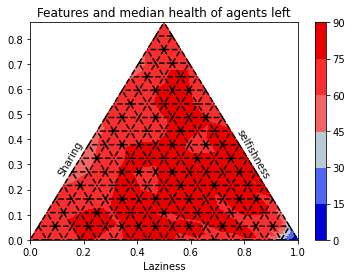

In [89]:
grouped_multiple = df11.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
avg_health = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

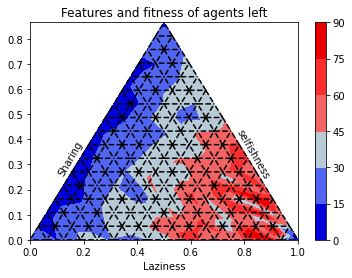

In [90]:
percentage_lazy = df11['percentage_lazy']
coself = df11['adjusted_chance_of_selfishness']
cosharing = df11['adjusted_chance_of_sharing']
num_agents = df11['num_agents']
avg_health = df11['avg_health']
fitness = df11['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

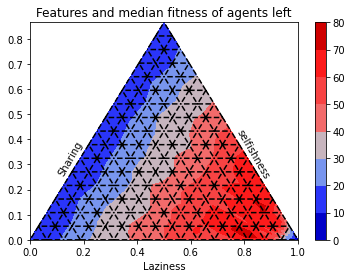

In [91]:
grouped_multiple = df11.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
fitness = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

# Group sizes

In [93]:
df12 = pd.read_csv('log_7.csv', names=['chance_of_selfishness','num_neighbors','num_agents','avg_health' ])
df12['chance_of_selfishness'] = df12['chance_of_selfishness']
df12['chance_of_sharing'] = 1 - df12['chance_of_selfishness']
df12['adjusted_fitness'] = (df12['num_agents'] * df12['avg_health']) / 20

from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightcoral', 'red', 'darkred']
v = [0,.4,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

coself = df12['chance_of_selfishness']
cosharing = df12['chance_of_sharing']
group = df12['num_neighbors']
num_agents = df12['num_agents']
avg_health = df12['avg_health']

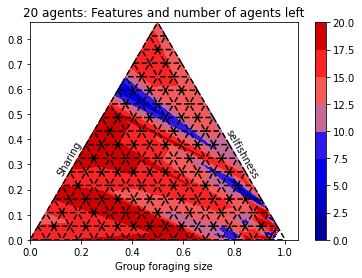

In [94]:
coself = df12['chance_of_selfishness']
cosharing = df12['chance_of_sharing']
group = df12['num_neighbors']
num_agents = df12['num_agents']
avg_health = df12['avg_health']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=group

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('20 agents: Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Group foraging size')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [95]:
grouped_multiple = df12.groupby(['num_neighbors', 'chance_of_sharing', 'chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


In [96]:
group = grouped_multiple['num_neighbors']
coself = grouped_multiple['chance_of_selfishness']
cosharing = grouped_multiple['chance_of_sharing']
num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']

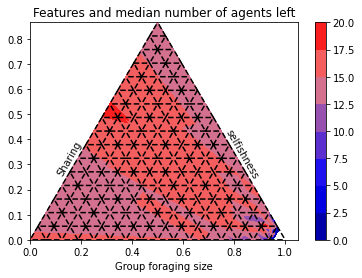

In [97]:
c = ['darkblue', 'blue', 'lightcoral', 'red']
# v = [0,.4,0.6,.9,1.]
v = [0, .25, .75, 1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=group

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Group foraging size')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

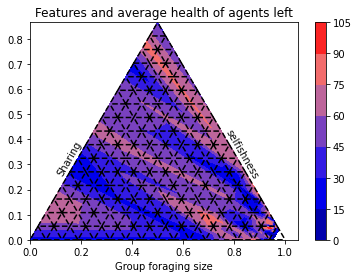

In [98]:
coself = df12['chance_of_selfishness']
cosharing = df12['chance_of_sharing']
group = df12['num_neighbors']
num_agents = df12['num_agents']
avg_health = df12['avg_health']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=group

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Group foraging size')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

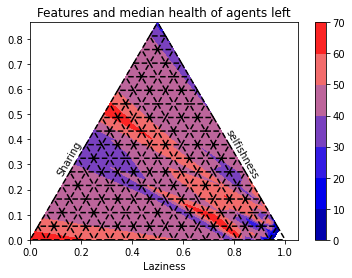

In [99]:
grouped_multiple = df12.groupby(['num_neighbors', 'chance_of_sharing', 'chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['num_neighbors']
coself = grouped_multiple['chance_of_selfishness']
cosharing = grouped_multiple['chance_of_sharing']
avg_health = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

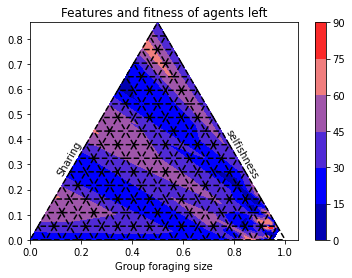

In [100]:
coself = df12['chance_of_selfishness']
cosharing = df12['chance_of_sharing']
group = df12['num_neighbors']
num_agents = df12['num_agents']
avg_health = df12['avg_health']
fitness = df12['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=group

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Group foraging size')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

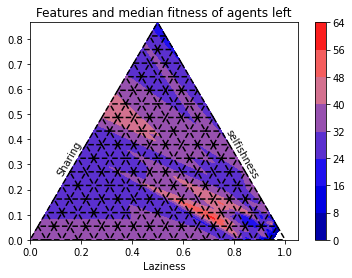

In [101]:
grouped_multiple = df12.groupby(['num_neighbors', 'chance_of_sharing', 'chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['num_neighbors']
coself = grouped_multiple['chance_of_selfishness']
cosharing = grouped_multiple['chance_of_sharing']
fitness = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

# Grouped

 - foraging agents move as an entity
 - some agents may be lazy
 - some agents may be sharing with the foraging group
 - some agents may be selfish
 - food can reach lazy iff food is collected withing radius of the base

In [105]:
df13 = pd.read_csv('log_8.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])
df13['chance_of_selfishness'] = df13['chance_of_selfishness']

df13['percentage_wandering'] = 1-df13['percentage_lazy']

df13['adjusted_chance_of_selfishness'] = df13['chance_of_selfishness'] * df13['percentage_wandering']
df13['adjusted_chance_of_sharing'] = (1-df13['chance_of_selfishness']) * df13['percentage_wandering']
df13['adjusted_fitness'] = (df13['num_agents'] * df13['avg_health']) / 20

percentage_lazy = df13['percentage_lazy']
coself = df13['adjusted_chance_of_selfishness']
cosharing = df13['adjusted_chance_of_sharing']
num_agents = df13['num_agents']
avg_health = df13['avg_health']

from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'white', 'lightcoral', 'red', 'darkred']
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

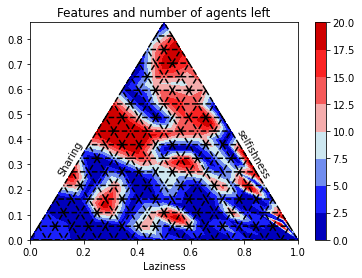

In [106]:
percentage_lazy = df13['percentage_lazy']
coself = df13['adjusted_chance_of_selfishness']
cosharing = df13['adjusted_chance_of_sharing']
num_agents = df13['num_agents']
avg_health = df13['avg_health']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [107]:
grouped_multiple = df13.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']

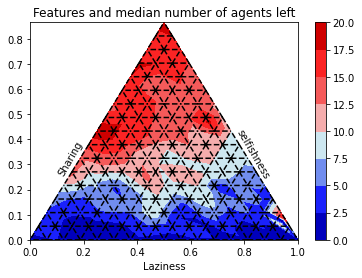

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

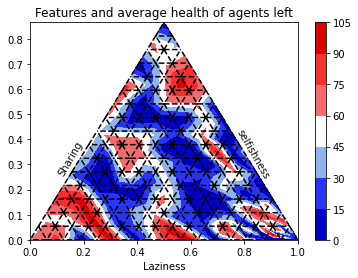

In [109]:
percentage_lazy = df13['percentage_lazy']
coself = df13['adjusted_chance_of_selfishness']
cosharing = df13['adjusted_chance_of_sharing']
num_agents = df13['num_agents']
avg_health = df13['avg_health']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

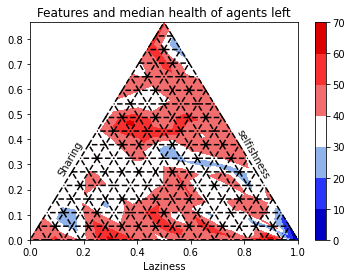

In [110]:
grouped_multiple = df13.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
avg_health = grouped_multiple['avg_health']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

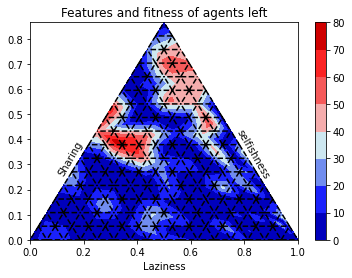

In [111]:
percentage_lazy = df13['percentage_lazy']
coself = df13['adjusted_chance_of_selfishness']
cosharing = df13['adjusted_chance_of_sharing']
num_agents = df13['num_agents']
avg_health = df13['avg_health']
fitness = df13['adjusted_fitness']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

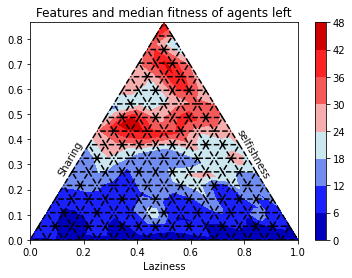

In [112]:
grouped_multiple = df13.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
fitness = grouped_multiple['adjusted_fitness']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

# Experiment: supershare

In [115]:
df14 = pd.read_csv('log_9.csv', names=['percentage_lazy','chance_of_selfishness','num_agents','avg_health' ])


df14['percentage_wandering'] = 1-df14['percentage_lazy']

df14['adjusted_chance_of_selfishness'] = df14['chance_of_selfishness'] * df14['percentage_wandering']
df14['adjusted_chance_of_sharing'] = (1-df14['chance_of_selfishness']) * df14['percentage_wandering']

df14.loc[df14.num_agents == 20, 'num_agents'] = 19.999
df14['adjusted_fitness'] = (df14['num_agents'] * df14['avg_health']) / 20


percentage_lazy = df14['percentage_lazy']
coself = df14['adjusted_chance_of_selfishness']
cosharing = df14['adjusted_chance_of_sharing']
num_agents = df14['num_agents']
avg_health = df14['avg_health']
fitness = df14['adjusted_fitness']

In [116]:
from  matplotlib.colors import LinearSegmentedColormap

c = ['darkblue', 'blue', 'lightblue', 'white', 'lightcoral', 'red', 'darkred']
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

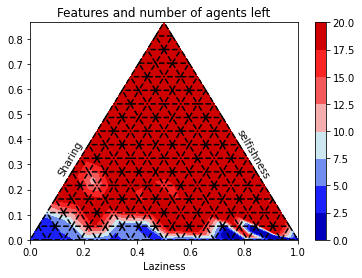

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

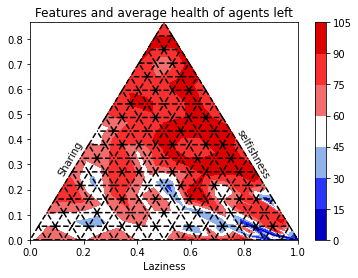

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and average health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

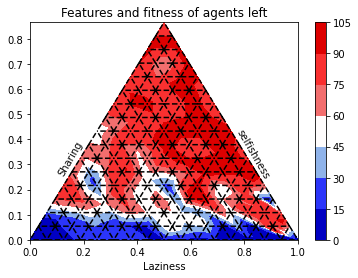

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and fitness of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [120]:
grouped_multiple = df14.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']



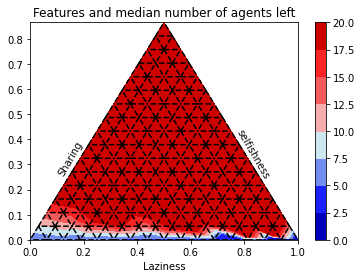

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = num_agents

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median number of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [122]:
grouped_multiple = df14.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'avg_health': ['median']})
grouped_multiple.columns = ['avg_health']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
avg_health = grouped_multiple['avg_health']
# avg_health = df4['avg_health']

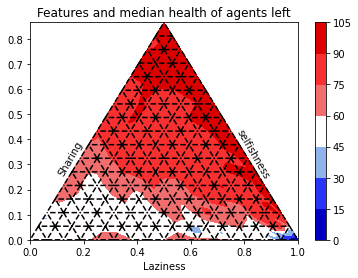

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = avg_health

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median health of agents left')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()

In [124]:
grouped_multiple = df14.groupby(['percentage_lazy', 'adjusted_chance_of_sharing', 'adjusted_chance_of_selfishness']).agg({'adjusted_fitness': ['median']})
grouped_multiple.columns = ['adjusted_fitness']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple


percentage_lazy = grouped_multiple['percentage_lazy']
coself = grouped_multiple['adjusted_chance_of_selfishness']
cosharing = grouped_multiple['adjusted_chance_of_sharing']
# num_agents = grouped_multiple['num_agents']
# avg_health = df4['avg_health']
fitness = grouped_multiple['adjusted_fitness']

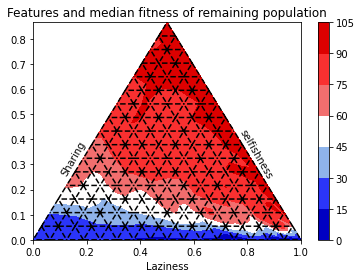

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

a=coself
c=cosharing
b=percentage_lazy

# values is stored in the last column
v = fitness

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5 * np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
ax = plt.tricontourf(x,y,T.triangles,v, cmap=cmap)
plt.title('Features and median fitness of remaining population')


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')
plt.xlabel('Laziness')

plt.text(0.1, 0.25,'Sharing',
     horizontalalignment='left',
     verticalalignment='bottom', rotation = 60)

plt.text(.9, .45,'selfishness',
     horizontalalignment='right',
     verticalalignment='top', rotation=-60)

cbar0 = plt.colorbar(ax,)
plt.show()